In [139]:
import numpy as np
import matplotlib.pyplot as plt
from read_file import *
import os

In [140]:
def get_reference(filename):
    harvest_ref = []
    rows = []
    # reading csv file
    with open(filename, 'r') as csvfile:
        # creating a csv reader object
        csvreader = csv.reader(csvfile)

        # extracting each data row one by one
        for row in csvreader:
            rows.append(row)

    harvest_ref = [float(x) for x in rows[0]]
    return np.array(harvest_ref)

In [141]:
def read_Fd_error(find_vector, rows):
    prev_pull = 0 
    vector = []
    for i, row in enumerate(rows):
        if len(row) > 0:
            compare_str = row[0][0:len(find_vector)]
            if compare_str == find_vector:
                pull = float(row[0][len(find_vector)::])
                vector.append(pull)
                
    return vector

alpha = 10; 15 iterations 

In [142]:
find_error = 'Pulling force relative error = '
find_dif = 'Pulling difference = '
find_fd = 'Fd = '
find_compression = 'Compression Loadcell = ['
find_pressure = 'Raspberry Reading = ['
find_pull_grip = 'Pulling Gripper = ['
find_pull = 'Pulling Force = ['
find_time = 'Time vector = ['
fail = 'PICKING FAILED'
iterations = 15

In [143]:
directory = 'D:/IST/5 ano/2 semestre/Tese/raspberry-grasping/data/Training Results/20220717_H_M_L_Force/data'

In [144]:
force_lvl = ['H', 'L', 'M', 'VH']
plant = ['S', 'TPU']

In [145]:
folder = os.listdir(directory)[0]
directory+'/'+folder
folder2 = os.listdir(directory+'/'+folder)[0]
os.listdir(directory+'/'+folder+'/'+folder2)[1][-4::]

'.txt'

In [146]:
for i,folder in enumerate(os.listdir(directory)):
    for j,folder2 in enumerate(os.listdir(directory+'/'+folder)):
        for folder3 in os.listdir(directory+'/'+folder+'/'+folder2):
            if folder3[-4::] == '.txt':
                filename = directory+'/'+folder+'/'+folder2+'/'+folder3
                rows = read_csv_file(filename)
                fail_index = find_fails(fail, find_fd, rows)
                error = read_Fd_error(find_error, rows)
                Fd = read_Fd_error(find_fd, rows)
                time_vec = read_pressure_pulling_force(find_time, fail_index, rows)
                pulling_gripper = read_pressure_pulling_force(find_pull_grip, fail_index, rows)
                raspberry_reading = read_pressure_pulling_force(find_pressure, fail_index, rows)
                pulling_force = read_pressure_pulling_force(find_pull, fail_index, rows)
                compression_loadcell = read_pressure_pulling_force(find_compression , fail_index, rows)

                fail_matrix = np.zeros((iterations,5))
                for k in fail_index:
                    iter = int(rows[k-1][0][12:14])
                    trial = int(rows[k-1][0][22::])
                    fail_matrix[iter-1, trial] = 1

                suffix = '_'+force_lvl[i]+'_'+plant[j]
                locals()['fails'+suffix] = fail_index
                locals()['fail_matrix'+suffix] = fail_matrix
                locals()['error'+suffix] = error
                locals()['time'+suffix]  = time_vec
                locals()['pulling_gripper'+suffix] = pulling_gripper
                locals()['raspberry'+suffix] = raspberry_reading 
                locals()['pulling_force'+suffix] = pulling_force
                locals()['comp'+suffix] = compression_loadcell
                locals()['Fd'+suffix] = Fd

            else:
                for file in os.listdir(directory+'/'+folder+'/'+folder2+'/'+folder3):
                    if file[-4::] == '.csv':
                        ref_p = directory+'/'+folder+'/'+folder2+'/'+folder3+'/'+file
                        ref_pressure = get_reference(ref_p)
                        ref_max = max(ref_pressure)
                        suffix = '_'+force_lvl[i]+'_'+plant[j]
                        locals()['ref_pressure'+suffix] = ref_pressure
                        locals()['ref_max'+suffix] = ref_max


In [147]:
# Only fully successful iteration
errors = [[error_H_S, error_H_TPU],
          [error_L_S, error_L_TPU],
          [error_M_S, error_M_TPU]]#,
          #[error_VH_S, error_VH_TPU]]

fail_matrixes = [[fail_matrix_H_S, fail_matrix_H_TPU],
                 [fail_matrix_L_S, fail_matrix_L_TPU],
                 [fail_matrix_M_S, fail_matrix_M_TPU]]#,
                 #[fail_matrix_VH_S, fail_matrix_VH_TPU]]

titles = [['High force with string', 'High force with TPU'],
          ['Low force with string', 'Low force with TPU'],
          ['Medium force with string', 'Medium force with TPU']]#,
          #['Very high force with string', 'Very high force with TPU']]

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(15,15)
for i in range(3):
    for j in range(2):
        plot_dif0 = []
        x_dif = []
        for k in range(len(errors[i][j])):
            if not any(fail_matrixes[i][j][k]):
                plot_dif0.append(-errors[i][j][k]*100)
                x_dif.append(k)
        axs[i][j].axhline(y = 0, color = 'y', label = 'axhline - full height')
        axs[i][j].scatter(x_dif, plot_dif0)
        axs[i][j].plot(x_dif, plot_dif0)
        axs[i][j].set_xlabel("Iterations")
        axs[i][j].set_ylabel("Relative error(%)")
        axs[i][j].set_ylim([-100, 300])
        axs[i][j].set_title(titles[i][j])

In [148]:
Fds = [[Fd_H_S, Fd_H_TPU], [Fd_L_S, Fd_L_TPU], [Fd_M_S, Fd_M_TPU]]#, [Fd_VH_S, Fd_VH_TPU]]
forces = [[[],[]],[[],[]],[[],[]]]#,[[],[]]]
for i in range(3):
    for j in range(2):
        for k in range(0,iterations*5,5):
            forces[i][j].append(Fds[i][j][k])


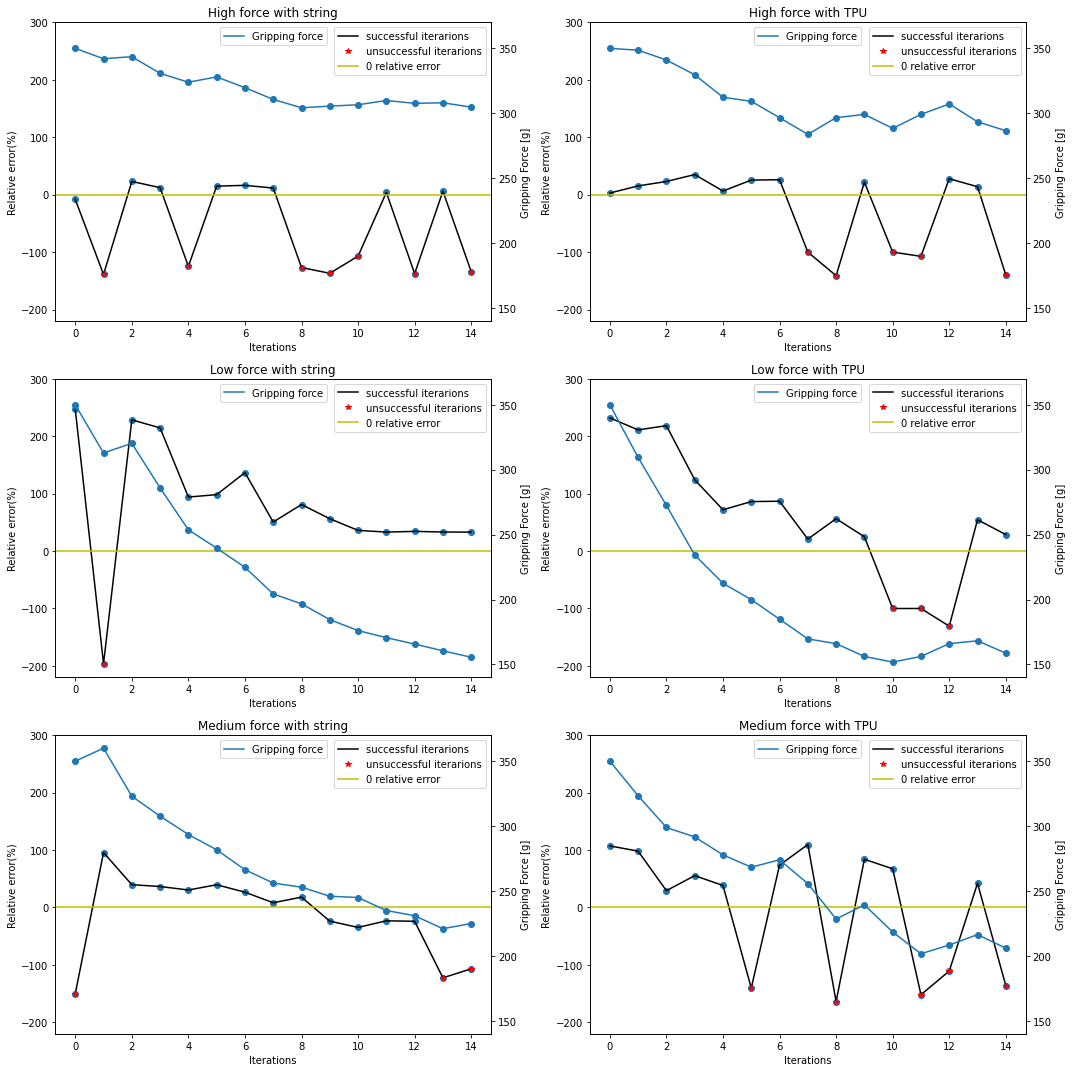

In [157]:
fig, axs = plt.subplots(3, 2)
plt.rcParams["figure.autolayout"] = True
fig.set_size_inches(15,15)
for i in range(3):
    for j in range(2):
        plot_dif0 = []
        x_dif = []
        star = []
        star_plot = []
        for k in range(len(errors[i][j])):
            if not any(fail_matrixes[i][j][k]):
                plot_dif0.append(-errors[i][j][k]*100)
                x_dif.append(k)
            else:
                plot_dif0.append(-errors[i][j][k]*100)
                x_dif.append(k)
                star.append(k)
                star_plot.append(-errors[i][j][k]*100)
        # plt.axhline(y = 0, color = 'y')
        axs[i][j].scatter(x_dif, plot_dif0)
        axs[i][j].plot(x_dif, plot_dif0,'k', label='successful iterarions')
        axs[i][j].plot(star, star_plot,'r*', label='unsuccessful iterarions')
        axs[i][j].axhline(y = 0, color = 'y', label = '0 relative error')
        axs[i][j].legend(loc="upper right")
        axs[i][j].set_xlabel("Iterations")
        axs[i][j].set_ylabel("Relative error(%)")
        axs[i][j].set_title(titles[i][j])
        axs[i][j].set_ylim([-220, 300])
        ax1 = axs[i][j].twinx()
        ax1.scatter(range(iterations),forces[i][j])
        ax1.plot(range(iterations), forces[i][j], label = 'Gripping force')
        ax1.legend(loc="upper center")
        ax1.set_ylabel("Gripping Force [g]")
        ax1.set_ylim([140,370])


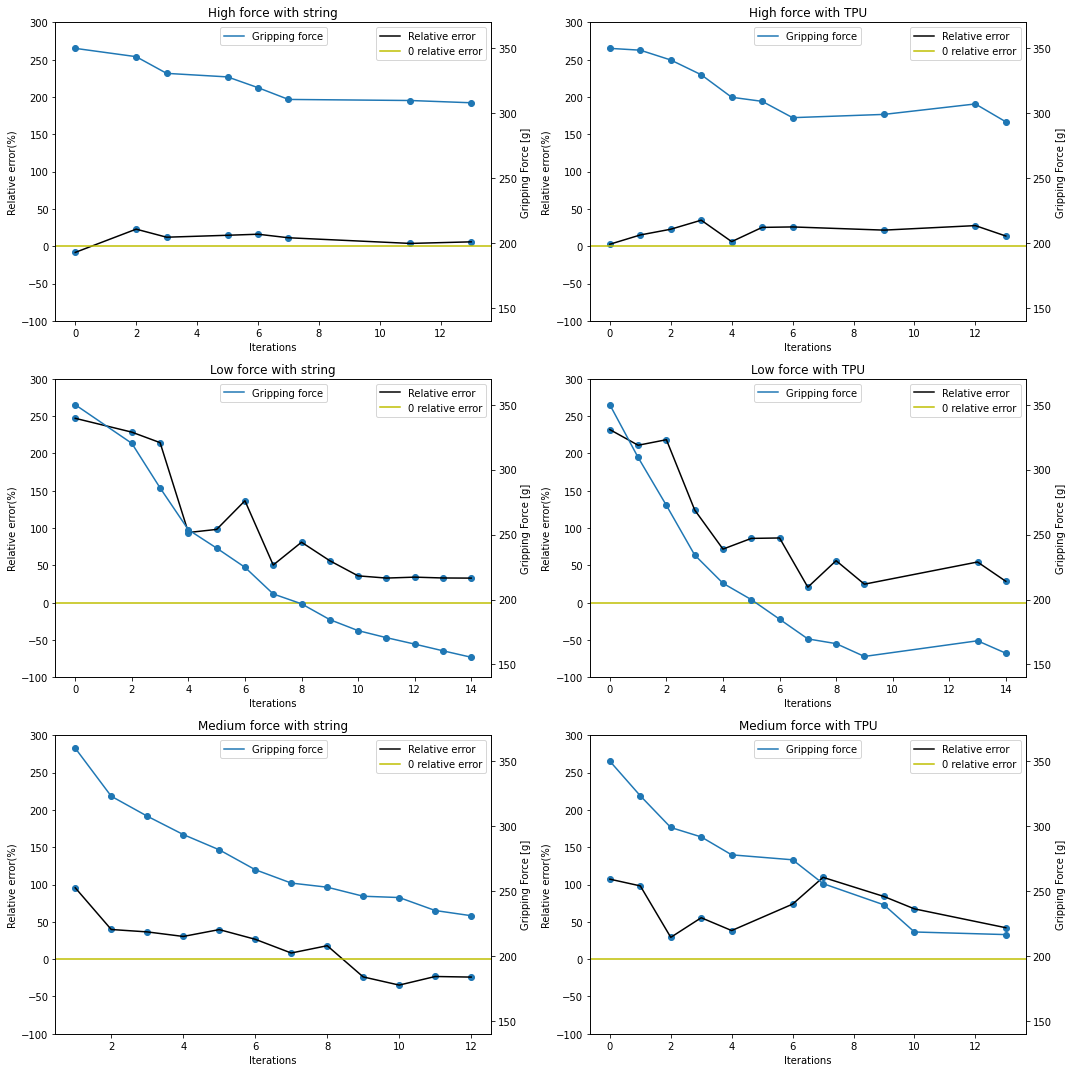

In [161]:
fig, axs = plt.subplots(3, 2)
plt.rcParams["figure.autolayout"] = True
fig.set_size_inches(15,15)
for i in range(3):
    for j in range(2):
        plot_dif0 = []
        x_dif = []
        star = []
        star_plot = []
        plot_force = []
        for k in range(len(errors[i][j])):
            if not any(fail_matrixes[i][j][k]):
                plot_dif0.append(-errors[i][j][k]*100)
                plot_force.append(forces[i][j][k])
                x_dif.append(k)
        # plt.axhline(y = 0, color = 'y')
        axs[i][j].scatter(x_dif, plot_dif0)
        axs[i][j].plot(x_dif, plot_dif0,'k', label='Relative error')
        axs[i][j].axhline(y = 0, color = 'y', label = '0 relative error')
        axs[i][j].legend(loc="upper right")
        axs[i][j].set_xlabel("Iterations")
        axs[i][j].set_ylabel("Relative error(%)")
        axs[i][j].set_title(titles[i][j])
        axs[i][j].set_ylim([-100, 300])
        ax1 = axs[i][j].twinx()
        ax1.scatter(x_dif,plot_force)
        ax1.plot(x_dif, plot_force, label = 'Gripping force')
        ax1.legend(loc="upper center")
        ax1.set_ylabel("Gripping Force [g]")
        ax1.set_ylim([140,370])